In [19]:
# Packages
import csv
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Function 03: 
# bubble sort based on first element in nested list
# served for function 02
def sort_list(listt):
    leng = len(listt)

    for i in range(0, leng):

        for j in range(0, leng-i-1):

            if listt[j][0] > listt[j + 1][0]:

                tempe = listt[j]
                listt[j] = listt[j + 1]
                listt[j + 1] = tempe

    return listt

In [21]:
# Function 04: integer input
# served for hourly counter
# with edge cases considered (input not an integer)
def int_input(strr):
    try:
        num = int(input(strr))
    except ValueError:
        print("please type in a valid number")
        num = int_input(strr)
    return num

In [22]:
# Function 01: every_10min_summary
def every_10min_summary(file):
    
    with open(file,'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        next(csv_reader)
        list_shorted = []
        for line in csv_reader:
            if line[4] == "Contacts Shorted":
                list_shorted.append(line)

        # put EventTime to datetime format
        for line in list_shorted:

            line[0] = datetime.datetime.strptime(line[0], "%m/%d/%Y %H:%M")
            # Note: In documentation, it says the format of month must be zero-padded,
            # but it seems to work in this non-zero-padded scenario

        # divide into separate time slot
        stats = []
        temp = list_shorted[0][0]
        count = 0
        ten_minutes = datetime.timedelta(minutes=10)
        one_minutes = datetime.timedelta(minutes=1)
        one_hour = datetime.timedelta(hours=1)
        for line in list_shorted:
            if line == list_shorted[-1]:
                if temp - ten_minutes < line[0] <= temp:
                    count += 1
                    stats.append([temp - ten_minutes + one_minutes, temp, count])
                else:
                    stats.append([temp - ten_minutes + one_minutes, temp, count])

                    if line[0] < temp - ten_minutes:
                        temp = line[0]
                    else:
                        temp = temp - ten_minutes
                    count = 1
                    stats.append([temp - ten_minutes + one_minutes, temp, count])
            elif temp-ten_minutes < line[0] <= temp:

                count += 1
            else:

                stats.append([temp-ten_minutes+one_minutes, temp, count])

                if line[0] <= temp-ten_minutes:
                    temp = line[0]
                else:
                    temp = temp-ten_minutes
                count = 1

        # print out the result
        for line in stats:
            if line == ["Start Time","End Time", "Counts"]:
                pass
            line[0] = line[0].strftime("%d/%m/%Y %H:%M")
            line[1] = line[1].strftime("%d/%m/%Y %H:%M")

        result = pd.DataFrame(stats, columns=["Start Time", "End Time", "Counts"])

        return result

In [23]:
file = 'event_messages.csv'
every_10min_summary(file)

,Start Time,End Time,Counts
0,17/09/2020 19:08,17/09/2020 19:17,6
1,17/09/2020 18:57,17/09/2020 19:06,5
2,17/09/2020 18:47,17/09/2020 18:56,8
3,17/09/2020 18:34,17/09/2020 18:43,17
4,17/09/2020 18:23,17/09/2020 18:32,5
5,17/09/2020 18:13,17/09/2020 18:22,7
6,17/09/2020 18:01,17/09/2020 18:10,4
7,17/09/2020 17:44,17/09/2020 17:53,5
8,17/09/2020 17:22,17/09/2020 17:31,8
9,17/09/2020 15:57,17/09/2020 16:06,2


In [24]:
# Function 02: hourly_summary
'''
From 17/09/2020 00:00 to 17/09/2020 24:00

Count the event "Contacts Shorted" in every one-hour slot, such as 00:00-01:00, 01:00-02:00 etc.

If no event counts in a certain hour, please count as zero, but make sure we have 24 hour slots
'''


def hourly_summary(file):
    with open(file, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        next(csv_reader)
        list_shorted = []
        for line in csv_reader:
            if line[4] == "Contacts Shorted":
                list_shorted.append(line)

        # put EventTime to datetime format
        for line in list_shorted:
            # transform it into datetime form and make sure it is zero-padded
            line[0] = datetime.datetime.strptime(line[0], "%m/%d/%Y %H:%M")
            line[0] = line[0].strftime("%m/%d/%Y %H:%M")
            line[0] = datetime.datetime.strptime(line[0], "%m/%d/%Y %H:%M")

        # sort the list
        list_sortedd = sort_list(list_shorted)

        # input the date

        date_month = int_input('Enter the month of the specific date: ')
        while (type(date_month)!= int) or (not (12>=date_month>=1)):
            date_month = int_input('Please type in a valid number.\nEnter the month of the specific date: ')

        date_day = int_input('Enter the day of the specific date: ')
        while not (1<=date_day<=31):
            date_day = int_input('Please type in a valid number.\nEnter the day of the specific date: ')

        date_year = int_input('Enter the year of the specific date: ')
        while not (2000<=date_year<=2100):
            date_year = int_input('Please type in a valid number.\nEnter the year of the specific date: ')

        # use a for loop to rule out all the data that are not in the designated date
        list_sorted = []
        for line in list_sortedd:
            if line[0].month == date_month and line[0].year == date_year and line[0].day == date_day:
                list_sorted.append(line)

        # divide into separate time slot

        stats = []
        count = 0
        one_minutes = datetime.timedelta(minutes=1)
        one_hour = datetime.timedelta(hours=1)
        temp = list_sorted[0][0].replace(minute=0) - one_hour

        while temp < list_sorted[-1][0]:
            for line in list_sorted:
                if temp < line[0] <= temp + one_hour:
                    count += 1
            stats.append([temp + one_minutes, temp + one_hour, count])
            count = 0
            temp += one_hour
        if stats[0][2] == 0:
            stats.pop(0)

        # print out the result
        for line in stats:
            if line == ["Start Time", "End Time", "Counts"]:
                pass
            line[0] = line[0].strftime("%H:%M")
            line[1] = line[1].strftime("%H:%M")

        time_interval = []
        counts = []
        for line in stats:
            time_interval.append("{} to {}".format(line[0], line[1]))
            counts.append(line[2])

        time_interval_tuple = tuple(time_interval)

        # draw the bar chart
        objects = time_interval_tuple
        y_pos = np.arange(len(objects))
        performance = counts

        plt.bar(y_pos, performance, align='center', alpha=0.5)
        plt.xticks(y_pos, objects)
        plt.ylabel('counts')
        plt.title('counter for {}-{}-{}'.format(date_month, date_day, date_year))
        plt.xticks(rotation=88)

        for i, v in enumerate(performance):
            plt.text(y_pos[i] - 0.25, v + 0.01, str(v))
        plt.show()
        
        return 0


Enter the month of the specific date: 09
Enter the day of the specific date: 17
Enter the year of the specific date: 2020


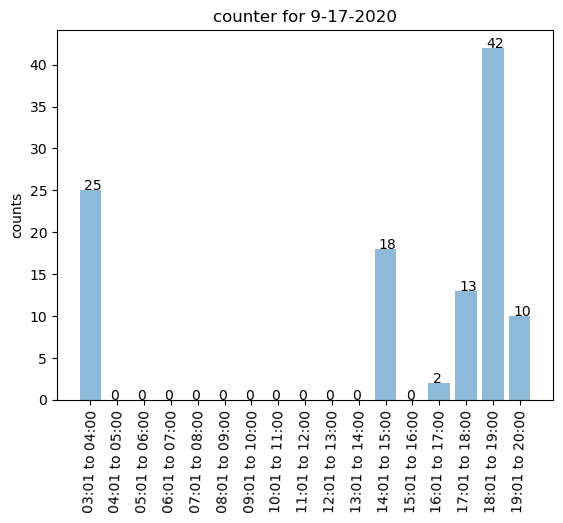

In [25]:
file = 'event_messages.csv'

hourly_summary(file)

In [26]:
def push_counter(file):
    with open(file, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        next(csv_reader)

        # put data into list form
        list_preliminary = []

        for line in csv_reader:
            if line[0]=='' or line[0]=='0':
                continue
            list_preliminary.append(line)

        # sort the list by date time and change the first column to datetime type
        for line in list_preliminary:

            line[0] = datetime.datetime.strptime(line[0], "%m/%d/%Y %I:%M:%S %p")
        # sort the list
        list_sorted = sort_list(list_preliminary)

        # counter with noise
        list_count = []
        for line in list_sorted:
            # if the previous row is a refill
            if temp_2=='1' and temp_1=='':
                # if this row is a push
                if line[2]=='' and line[1]=='1':
                    # append the refill time and this row into the new list
                    list_count.append([temp_0,1])
            # if the previous row is a push
            elif temp_2=='' and temp_1=='':

                # if this row is a push
                if temp_2=='' and temp_1=='1':
                    list_count[-1][1]+=1

            temp_0 = line[0]
            temp_1 = line[1]
            temp_2 = line[2]

        i=0
        temp=0
        for line in list_count:
            if temp==1:
                del list_count[i-1]
            temp = line[1]
            i += 1
        final_stats = [["Refill Time",  "No. of Push"]] + list_count

        return (final_stats)